# Linear Regression 線形回帰
1. お手製データセットで線形回帰を行う
2. irisデータセットで線形回帰を行う

In [184]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
%matplotlib inline

## お手製データセット

### データセット作成

In [186]:
#x_train = np.random.rand(15, 1)
#y_train = np.random.rand(15, 1)
#x_train = x_train.astype(np.float32)
#y_train = y_train.astype(np.float32)
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)
x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)
x_train.dtype
y_train.dtype
x_train.shape
y_train.shape
x_train
y_train

dtype('float32')

dtype('float32')

(15, 1)

(15, 1)

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 3.1  ]], dtype=float32)

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

### モデルを構築

- nn.Module を継承したクラスを作成
- __init__() に層オブジェクトを定義
- forward() に順方向の処理

In [187]:
import torch
import torch.nn as nn

# hyper parameter
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [188]:
# linear regression model
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression(input_size, output_size)

In [189]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### LOSSとOptimizer
-  評価は平均二乗誤差
- 確率的勾配降下法 Stochastic Gradient Descent

In [190]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [191]:
criterion
optimizer

MSELoss()

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### 訓練
- 各エポックで zero_grad() で勾配を初期化
- パラメータは optimizer.step() で更新
- 10epochごとに訓練 loss を表示
- モデルを保存

In [192]:
# train the model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.item()))

# save the model
torch.save(model.state_dict(), 'model.pkl')

Epoch [10/60], Loss: 9.9660
Epoch [20/60], Loss: 1.7796
Epoch [30/60], Loss: 0.4361
Epoch [40/60], Loss: 0.2156
Epoch [50/60], Loss: 0.1794
Epoch [60/60], Loss: 0.1734


### 実行結果
訓練データと予測した直線の描画

In [193]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
predicted

array([[1.5058814],
       [1.811832 ],
       [2.1177824],
       [2.4543278],
       [2.515518 ],
       [1.7473042],
       [3.3079295],
       [2.3074718],
       [2.699088 ],
       [1.1907525],
       [2.5466692],
       [3.5894039],
       [2.0657709],
       [2.8122897],
       [1.4502541]], dtype=float32)

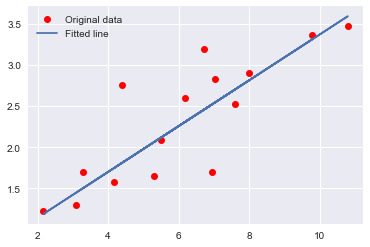

In [194]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()